In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [60]:
states = gpd.read_file('data/50-22_init_point/usa-states-census-2014.shp')
tornado = gpd.read_file('data/50-22_init_point/1950-2022-torn-initpoint.shp')
torn_paths = gpd.read_file('data/50-22_init_point/1950-2018-torn-aspath.shp')
bounds = gpd.read_file('data/cb_2017_us_state_500k/cb_2017_us_state_500k.shp')

In [61]:
states[states['NAME'] == 'Texas']

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
16,48,01779801,0400000US48,48,TX,Texas,00,676601887070,19059877230,Southwest,"POLYGON Z ((-106.62345 31.91403 0.00000, -106...."


In [62]:
tornado = tornado.drop(columns=['date'])

In [63]:
tornado.head()

,om,yr,mo,dy,time,tz,st,stf,stn,mag,...,loss,closs,slat,slon,elat,elon,len,wid,fc,geometry
0,192,1950,10,1,21:00:00,3,OK,40,23,1,...,4.0,0.0,36.73,-102.52,36.8800,-102.3000,15.8,10,0,POINT (-102.52000 36.73000)
1,193,1950,10,9,02:15:00,3,NC,37,9,3,...,5.0,0.0,34.17,-78.60,34.1701,-78.5999,2.0,880,0,POINT (-78.60000 34.17000)
2,195,1950,11,20,02:20:00,3,KY,21,1,2,...,5.0,0.0,37.37,-87.20,37.3701,-87.1999,0.1,10,0,POINT (-87.20000 37.37000)
3,196,1950,11,20,04:00:00,3,KY,21,2,1,...,5.0,0.0,38.20,-84.50,38.2001,-84.4999,0.1,10,0,POINT (-84.50000 38.20000)
4,197,1950,11,20,07:30:00,3,MS,28,14,1,...,4.0,0.0,32.42,-89.13,32.4201,-89.1299,2.0,37,0,POINT (-89.13000 32.42000)


In [64]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [65]:
states = states.to_crs('EPSG:3395')

In [66]:
tornado.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [67]:
tornado = tornado.to_crs('EPSG:3395')

<Axes: >

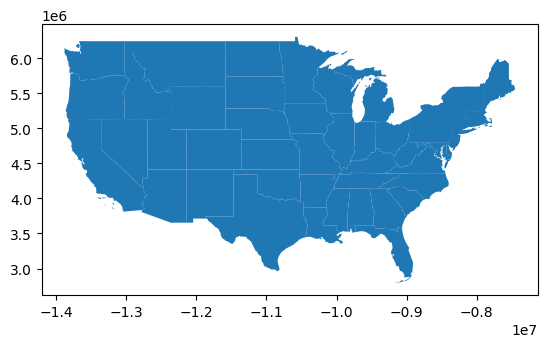

In [68]:
states.plot()

<Axes: >

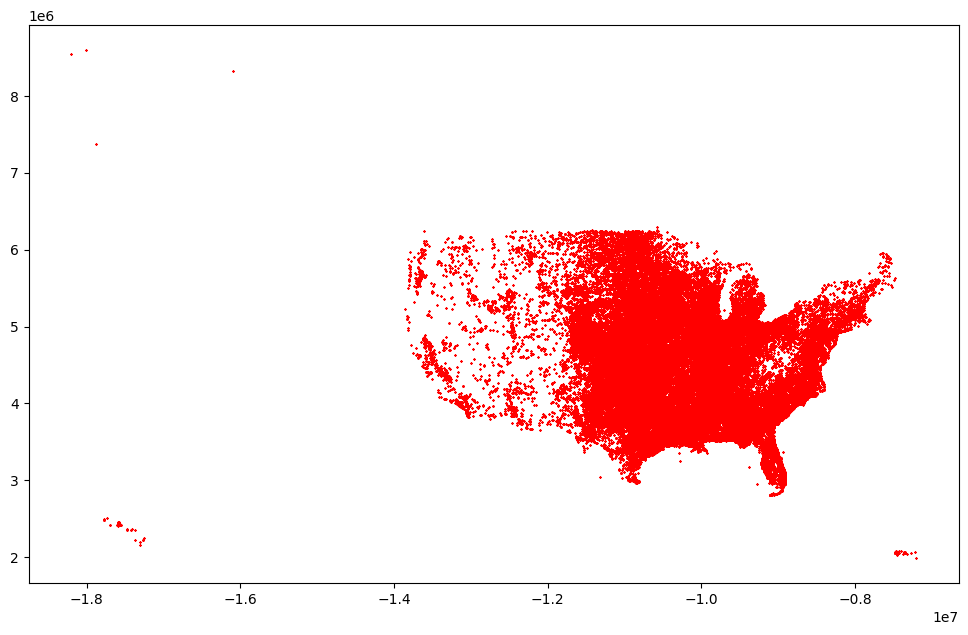

In [69]:
tornado.plot(figsize=(12,9), color='red', marker='x', markersize=1)

<Axes: >

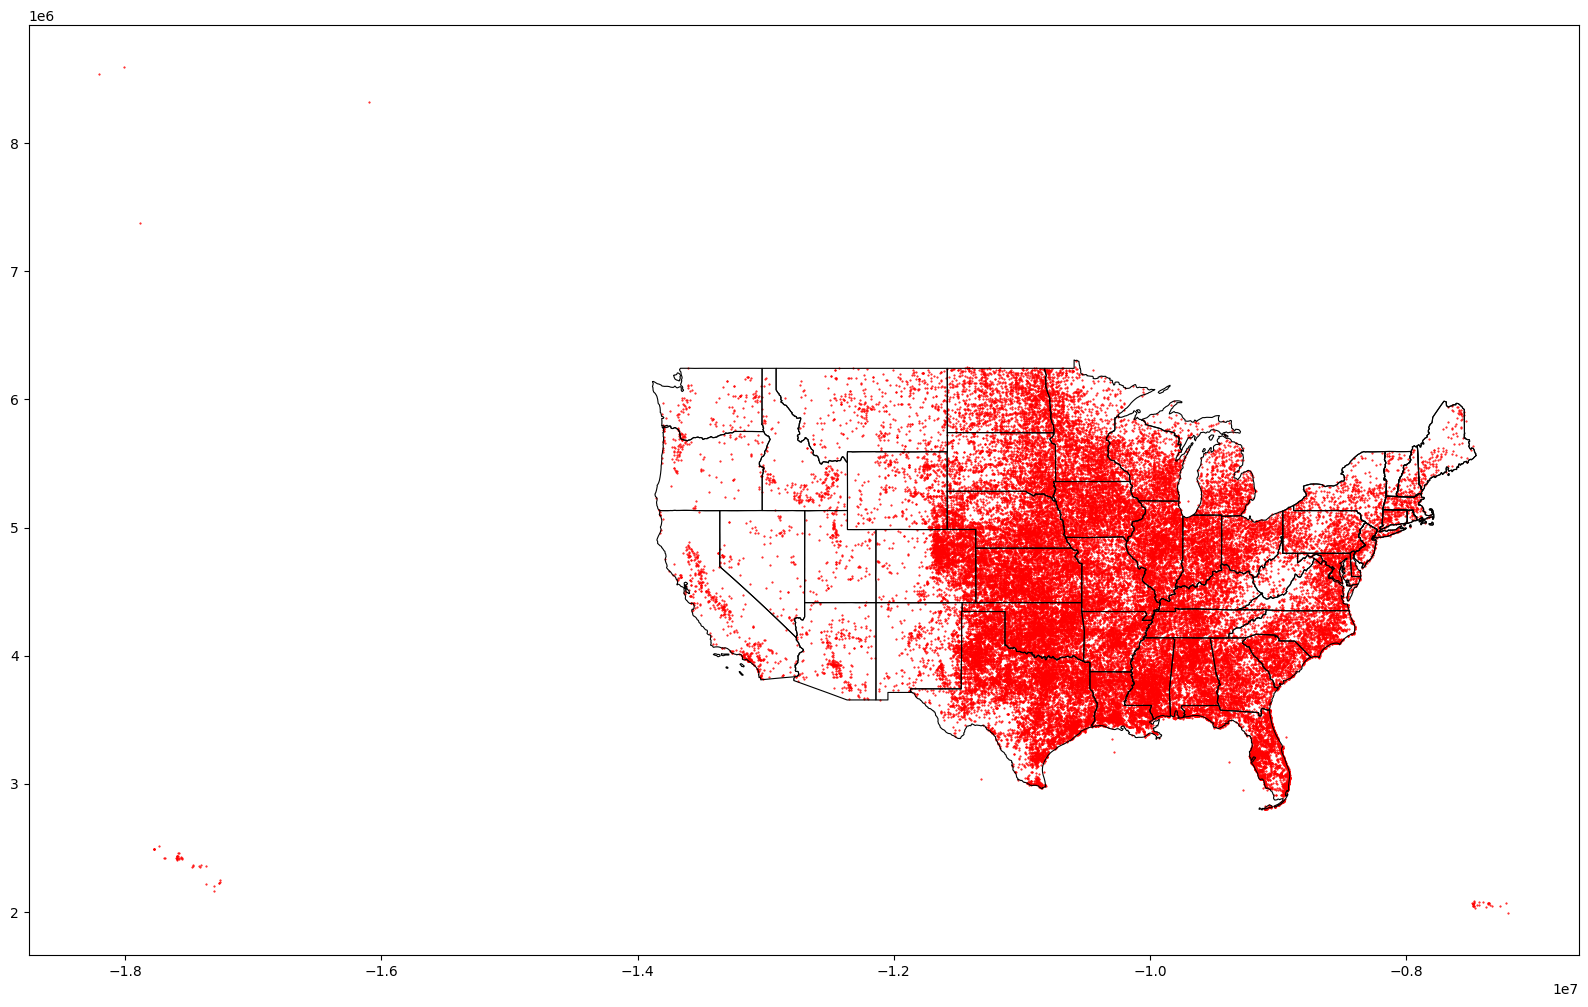

In [70]:
fig = plt.figure(1, figsize=(20,20)) 
ax = fig.add_subplot()
states.boundary.plot(ax=ax, color='black', linewidth=.8)

tornado.plot(ax=ax, color='red', marker='.', markersize=1)

In [71]:
# fig = plt.figure(1, figsize=(12,9)) 
# ax = fig.add_subplot()

# ax.set_xlim(-14100244, -7200000)
# ax.set_ylim(2600000, 6550000)

# fig.suptitle('United States Tornado Map (1950-2018)', fontsize=16)

# states.boundary.plot(ax=ax, color='black', linewidth=.8)

# tornado.plot(ax=ax, color='red', marker='v', markersize=8)

In [72]:
torn_paths = torn_paths.to_crs("EPSG:3395")

In [73]:
torn_paths.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

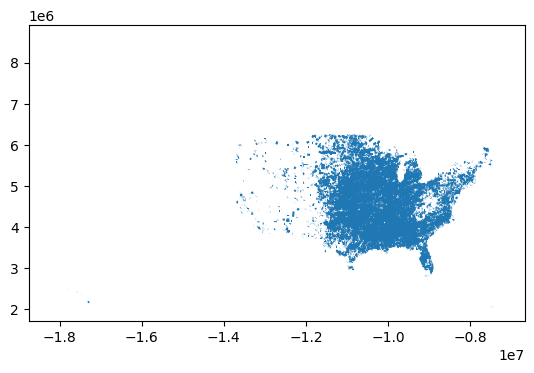

In [74]:
torn_paths.plot()

In [75]:
torn_sts = tornado.copy()

In [76]:
torn_sts['tornados'] = 1

In [77]:
# torn_sts = torn_sts[['tornados', 'st']].groupby('st').count()
# torn_sts.sort_values('tornados', ascending=False)

<Axes: >

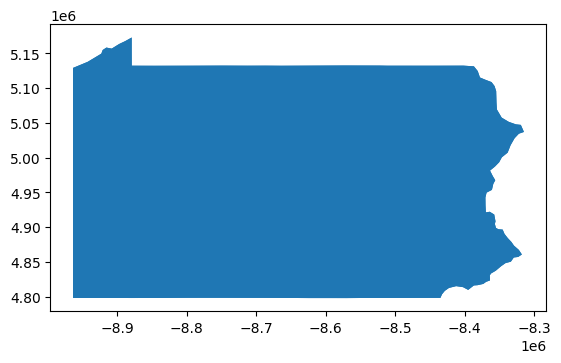

In [78]:
state_map = states[states['NAME'] == 'Pennsylvania']
state_map.plot()

In [79]:
def tornado_start():
    abbr = input('Please enter a state abbreviation: ')
    state_map = states[states['STUSPS'] == abbr]
    torn_start = tornado[tornado['st'] == abbr]
    # tornado_path = torn_paths[torn_paths['st'] == abbr]
    
    fig = plt.figure(1, figsize=(13,13)) 
    ax = fig.add_subplot()
    

    fig.suptitle(f'{abbr} Tornado Paths (1950-2022)', fontsize=16)

    state_map.boundary.plot(ax=ax, color='black', linewidth=.8)

    # plotting tornado paths
    torn_start.plot(ax=ax, color='pink', marker='v', markersize=20)
    # tornado_path.plot(ax=ax, color='red')
    

Please enter a state abbreviation: DE


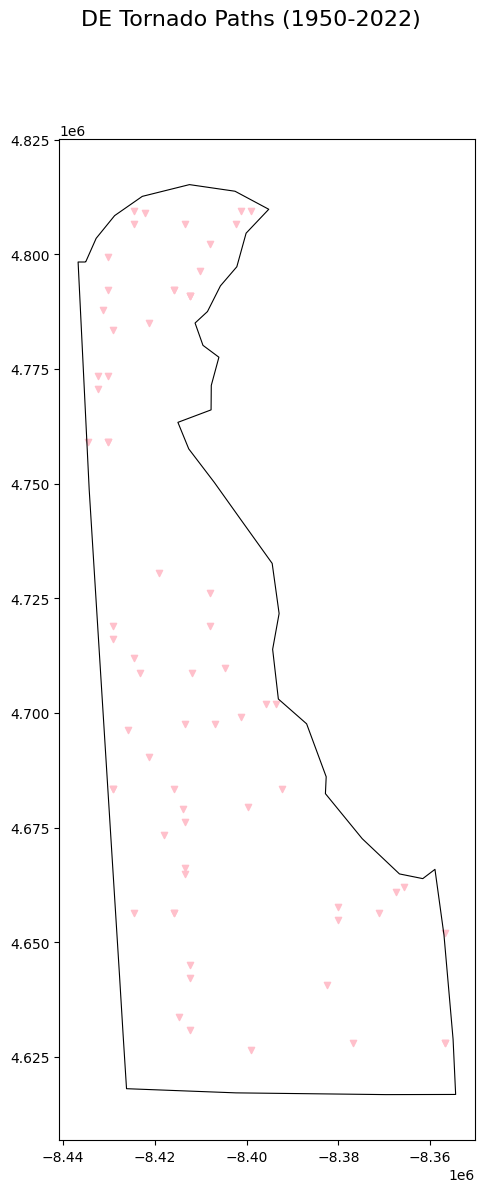

In [80]:
tornado_start()

In [81]:
def tornado_path():
    abbr = input('Please enter a state abbreviation: ')
    state_map = states[states['STUSPS'] == abbr]
    torn_start = tornado[tornado['st'] == abbr]
    tornado_path = torn_paths[torn_paths['st'] == abbr]
    
    fig = plt.figure(1, figsize=(13,13)) 
    ax = fig.add_subplot()
    

    fig.suptitle(f'{abbr} Tornado Paths (1950-2022)', fontsize=16)

    state_map.boundary.plot(ax=ax, color='black', linewidth=.8)

    # plotting tornado paths
    torn_start.plot(ax=ax, color='pink', marker='v', markersize=20)
    tornado_path.plot(ax=ax, color='red')

In [82]:
# states

Please enter a state abbreviation: DE


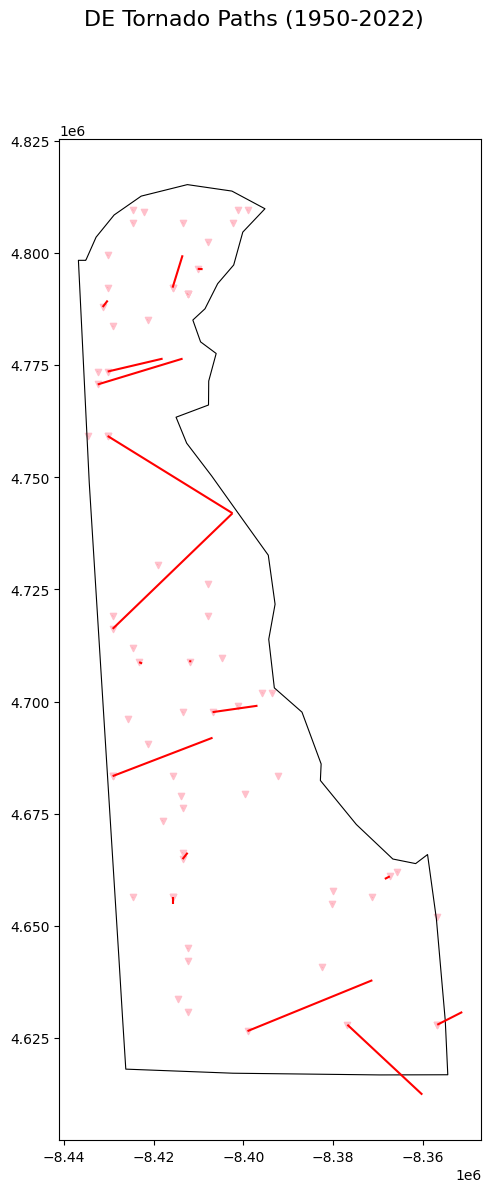

In [83]:
tornado_path()

In [84]:
def tornado_year():
    abbr = input('Please enter a state abbreviation: ')
    state_map = states[states['STUSPS'] == abbr]
    torn_start = tornado[tornado['st'] == abbr]
    tornado_path = torn_paths[torn_paths['st'] == abbr]
    
    fig = plt.figure(1, figsize=(13,13)) 
    ax = fig.add_subplot()
    

    fig.suptitle(f'{abbr} Tornado by Year (1950-2022)', fontsize=16)

    state_map.boundary.plot(ax=ax, color='black', linewidth=.8)
    
    # plotting by year
    torn_start.plot(ax=ax, column='yr', cmap="coolwarm", marker='v', markersize=20)
    # tornado_path.plot(ax=ax, column='yr', cmap="coolwarm")

Please enter a state abbreviation: DE


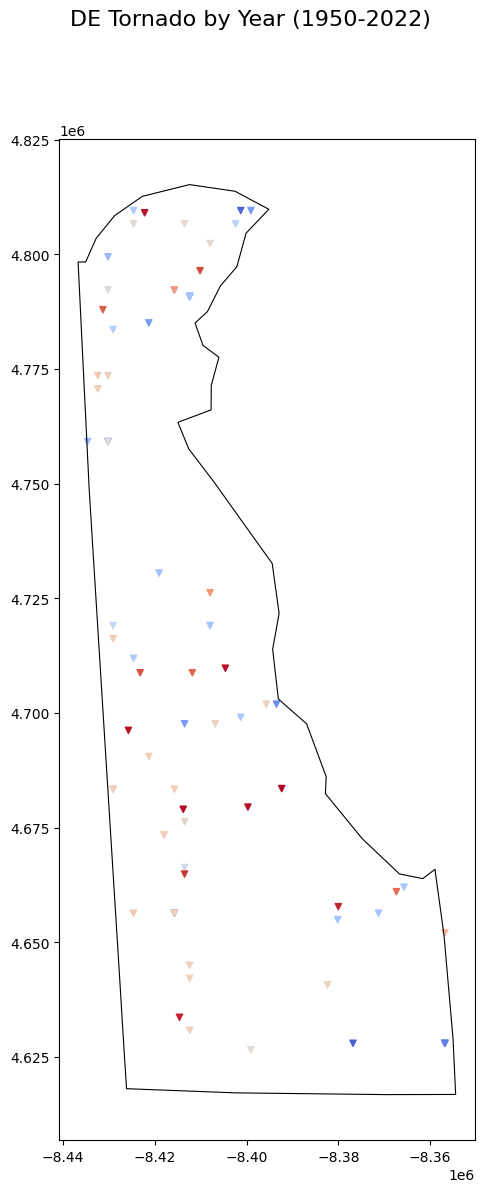

In [85]:
tornado_year()

In [86]:
print("yes")

yes


In [87]:
tornado

,om,yr,mo,dy,time,tz,st,stf,stn,mag,...,loss,closs,slat,slon,elat,elon,len,wid,fc,geometry
0,192,1950,10,1,21:00:00,3,OK,40,23,1,...,4.0,0.0,36.7300,-102.5200,36.8800,-102.3000,15.80,10,0,POINT (-11412474.196 4375983.260)
1,193,1950,10,9,02:15:00,3,NC,37,9,3,...,5.0,0.0,34.1700,-78.6000,34.1701,-78.5999,2.00,880,0,POINT (-8749711.976 4027653.718)
2,195,1950,11,20,02:20:00,3,KY,21,1,2,...,5.0,0.0,37.3700,-87.2000,37.3701,-87.1999,0.10,10,0,POINT (-9707059.597 4464869.162)
3,196,1950,11,20,04:00:00,3,KY,21,2,1,...,5.0,0.0,38.2000,-84.5000,38.2001,-84.4999,0.10,10,0,POINT (-9406496.972 4581290.592)
4,197,1950,11,20,07:30:00,3,MS,28,14,1,...,4.0,0.0,32.4200,-89.1300,32.4201,-89.1299,2.00,37,0,POINT (-9921906.214 3795663.464)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68696,621922,2022,9,28,13:32:00,3,FL,12,0,0,...,0.0,0.0,28.0830,-80.8669,28.1249,-80.8841,3.00,100,0,POINT (-9002062.130 3239332.343)
68697,621923,2022,9,30,10:25:00,3,NC,37,0,0,...,0.0,0.0,33.9128,-78.2882,33.9132,-78.3011,0.74,20,0,POINT (-8715002.559 3993260.295)
68698,621924,2022,9,30,13:22:00,3,NC,37,0,-9,...,0.0,0.0,35.3242,-76.7076,35.3325,-76.7147,0.70,12,0,POINT (-8539050.972 4183320.041)
68699,621900,2022,9,4,15:44:00,3,OH,39,0,0,...,12000.0,0.0,41.0210,-80.6559,41.0220,-80.6555,0.07,15,0,POINT (-8978573.717 4987388.665)


In [88]:
1950 - 2022

-72

In [89]:
tornado.columns

Index(['om', 'yr', 'mo', 'dy', 'time', 'tz', 'st', 'stf', 'stn', 'mag', 'inj',
       'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len', 'wid',
       'fc', 'geometry'],
      dtype='object')

In [90]:
tornado.yr.value_counts()

yr
2004    1817
2011    1691
2008    1689
2019    1517
2017    1428
        ... 
1963     463
1953     421
1951     260
1952     240
1950     201
Name: count, Length: 73, dtype: int64

In [91]:
statelist = set(tornado.st.values.tolist())
statelist

{'AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY'}

In [92]:
len(statelist)

53

In [93]:
state_names = {
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
    'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming', 'American Samoa', 'District of Columbia', 'Guam', 'Northern Mariana Islands',
    'Puerto Rico', 'United States Virgin Islands'
}

In [94]:
twisty = gpd.read_file("data/us_tornado_dataset_1950_2021.csv")
windy = gpd.read_file("data/1955-2022_wind.csv")

In [95]:
twisty

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid,geometry
0,1950,1,3,1950-01-03,IL,3,3,0,39.1,-89.3,39.12,-89.23,3.6,130,None
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150,None
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.0,0.0,0.1,10,None
3,1950,1,13,1950-01-13,AR,3,1,1,34.4,-94.37,0.0,0.0,0.6,17,None
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.0,0.0,0.1,100,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,2021,12,30,2021-12-30,GA,1,0,0,31.1703,-83.3804,31.1805,-83.3453,2.19,150,None
67554,2021,12,30,2021-12-30,GA,1,0,0,31.69,-82.73,31.7439,-82.5412,11.71,300,None
67555,2021,12,31,2021-12-31,AL,1,0,0,34.2875,-85.7878,34.2998,-85.7805,0.95,50,None
67556,2021,12,31,2021-12-31,GA,1,0,0,33.7372,-84.9998,33.7625,-84.9633,2.75,150,None


In [96]:
windy = windy.drop(columns=["tz","fat","closs","inj"])

In [97]:
windy.shape

(495580, 26)

In [98]:
windy

,om,yr,mo,dy,date,time,st,stf,stn,mag,...,wid,ns,sn,sg,f1,f2,f3,f4,mt,geometry
0,397,1955,10,12,1955-10-12,15:00:00,AR,5,24,0.0,...,0,0,0,0,31,0,0,0,,None
1,398,1955,10,18,1955-10-18,08:00:00,FL,12,9,0.0,...,0,0,0,0,25,0,0,0,,None
2,399,1955,10,23,1955-10-23,18:00:00,MI,26,9,0.0,...,0,0,0,0,5,0,0,0,,None
3,400,1955,10,23,1955-10-23,19:00:00,MI,26,10,0.0,...,0,0,0,0,57,0,0,0,,None
4,401,1955,10,23,1955-10-23,20:00:00,MI,26,11,0.0,...,0,0,0,0,63,0,0,0,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495575,730304,2022,09,08,2022-09-08,18:22:00,NV,32,0,51.0000,...,0,0,0,0,3,0,0,0,MG,None
495576,730305,2022,09,09,2022-09-09,14:00:00,CA,06,0,50.0000,...,0,0,0,0,65,0,0,0,EG,None
495577,730306,2022,09,09,2022-09-09,15:48:00,TX,48,0,50.0000,...,0,0,0,0,409,0,0,0,EG,None
495578,730307,2022,09,09,2022-09-09,21:04:00,NM,35,0,56.0000,...,0,0,0,0,49,0,0,0,EG,None


In [99]:
windy.f4.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         0
1         0
2         0
3         0
4         0
         ..
495575    0
495576    0
495577    0
495578    0
495579    0
Name: f4, Length: 495580, dtype: object>

In [100]:
windy = windy.drop(columns=['f2','f3','f4'])

In [101]:
windy

,om,yr,mo,dy,date,time,st,stf,stn,mag,...,elat,elon,len,wid,ns,sn,sg,f1,mt,geometry
0,397,1955,10,12,1955-10-12,15:00:00,AR,5,24,0.0,...,0.0,0.0,0,0,0,0,0,31,,None
1,398,1955,10,18,1955-10-18,08:00:00,FL,12,9,0.0,...,0.0,0.0,0,0,0,0,0,25,,None
2,399,1955,10,23,1955-10-23,18:00:00,MI,26,9,0.0,...,0.0,0.0,0,0,0,0,0,5,,None
3,400,1955,10,23,1955-10-23,19:00:00,MI,26,10,0.0,...,0.0,0.0,0,0,0,0,0,57,,None
4,401,1955,10,23,1955-10-23,20:00:00,MI,26,11,0.0,...,0.0,0.0,0,0,0,0,0,63,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495575,730304,2022,09,08,2022-09-08,18:22:00,NV,32,0,51.0000,...,36.5846,-115.6699,0,0,0,0,0,3,MG,None
495576,730305,2022,09,09,2022-09-09,14:00:00,CA,06,0,50.0000,...,33.9200,-117.4400,0,0,0,0,0,65,EG,None
495577,730306,2022,09,09,2022-09-09,15:48:00,TX,48,0,50.0000,...,27.9700,-97.6400,0,0,0,0,0,409,EG,None
495578,730307,2022,09,09,2022-09-09,21:04:00,NM,35,0,56.0000,...,35.2100,-106.1600,0,0,0,0,0,49,EG,None


In [102]:
windy = windy.drop(columns=['len','wid','ns','sn','sg','geometry'])

In [103]:
# windy.closs.info

In [104]:
windy

,om,yr,mo,dy,date,time,st,stf,stn,mag,loss,slat,slon,elat,elon,f1,mt
0,397,1955,10,12,1955-10-12,15:00:00,AR,5,24,0.0,0.0,35.78,-90.68,0.0,0.0,31,
1,398,1955,10,18,1955-10-18,08:00:00,FL,12,9,0.0,0.0,25.78,-80.28,0.0,0.0,25,
2,399,1955,10,23,1955-10-23,18:00:00,MI,26,9,0.0,0.0,42.58,-85.9,0.0,0.0,5,
3,400,1955,10,23,1955-10-23,19:00:00,MI,26,10,0.0,0.0,43.28,-84.58,0.0,0.0,57,
4,401,1955,10,23,1955-10-23,20:00:00,MI,26,11,0.0,0.0,43.7,-82.68,0.0,0.0,63,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495575,730304,2022,09,08,2022-09-08,18:22:00,NV,32,0,51.0000,0,36.5846,-115.6699,36.5846,-115.6699,3,MG
495576,730305,2022,09,09,2022-09-09,14:00:00,CA,06,0,50.0000,0,33.9200,-117.4400,33.9200,-117.4400,65,EG
495577,730306,2022,09,09,2022-09-09,15:48:00,TX,48,0,50.0000,5000,27.9700,-97.6400,27.9700,-97.6400,409,EG
495578,730307,2022,09,09,2022-09-09,21:04:00,NM,35,0,56.0000,0,35.2100,-106.1600,35.2100,-106.1600,49,EG


In [105]:
windy[(windy.st == 'TX') & (windy.yr == '2021') & (windy.mo == '10') & (windy.dy == '27')]

,om,yr,mo,dy,date,time,st,stf,stn,mag,loss,slat,slon,elat,elon,f1,mt
462840,712374,2021,10,27,2021-10-27,00:14:00,TX,48,0,56.0000,0,33.1100,-98.5600,33.1100,-98.5600,503,MG
462841,712375,2021,10,27,2021-10-27,00:39:00,TX,48,0,53.0000,0,33.4400,-98.2100,33.4400,-98.2100,237,MG
462842,712376,2021,10,27,2021-10-27,00:46:00,TX,48,0,55.0000,0,32.7833,-98.0634,32.7833,-98.0634,363,MG
462843,712377,2021,10,27,2021-10-27,01:20:00,TX,48,0,52.0000,3000,33.1300,-97.4500,33.1300,-97.4500,497,EG
462844,712378,2021,10,27,2021-10-27,01:27:00,TX,48,0,54.0000,3000,33.1000,-97.4600,33.1000,-97.4600,497,MG
462845,712379,2021,10,27,2021-10-27,01:46:00,TX,48,0,53.0000,3000,33.2400,-97.2500,33.2400,-97.2500,121,MG
462846,712380,2021,10,27,2021-10-27,01:47:00,TX,48,0,52.0000,0,33.0400,-97.2800,33.0400,-97.2800,121,MG
462847,712381,2021,10,27,2021-10-27,01:53:00,TX,48,0,52.0000,0,33.2000,-97.2000,33.2000,-97.2000,121,EG
462849,712383,2021,10,27,2021-10-27,03:50:00,TX,48,0,56.0000,0,30.5019,-97.8252,30.5019,-97.8252,491,EG
462850,712384,2021,10,27,2021-10-27,03:55:00,TX,48,0,52.0000,5000,30.3700,-97.7600,30.3700,-97.7600,453,EG


In [106]:
twisty[(twisty.st == 'TX') & (twisty.dy == '27') & (twisty.yr == '2021')]

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid,geometry
66397,2021,3,27,2021-03-27,TX,2,0,0,31.6884,-95.2293,31.8332,-94.9242,20.53,500,None
66398,2021,3,27,2021-03-27,TX,2,1,0,31.9009,-94.7138,32.0669,-94.3878,22.29,300,None
66399,2021,3,27,2021-03-27,TX,2,3,1,32.0982,-94.3089,32.2012,-94.0669,15.84,1600,None
66473,2021,4,27,2021-04-27,TX,-9,0,0,33.85,-99.09,33.85,-99.09,0.2,30,None
66474,2021,4,27,2021-04-27,TX,0,0,0,32.5891,-100.7986,32.5954,-100.7544,2.61,50,None
66475,2021,4,27,2021-04-27,TX,3,0,0,33.751,-99.921,33.791,-99.788,8.4,400,None
66849,2021,6,27,2021-06-27,TX,-9,0,0,33.5853,-102.2992,33.5853,-102.2992,0.02,30,None
67300,2021,10,27,2021-10-27,TX,0,0,0,30.12,-95.36,30.12,-95.36,0.02,20,None
67301,2021,10,27,2021-10-27,TX,0,0,0,29.9036,-94.0196,29.9077,-94.0168,0.33,100,None
67302,2021,10,27,2021-10-27,TX,2,0,0,30.1108,-93.8337,30.1326,-93.8101,2.06,50,None


In [107]:
windy[(windy.st == 'TX')]

,om,yr,mo,dy,date,time,st,stf,stn,mag,loss,slat,slon,elat,elon,f1,mt
16,394,1955,10,04,1955-10-04,16:00:00,TX,48,72,0.0,0.0,33.7,-101.18,0.0,0.0,107,
38,20,1955,03,20,1955-03-20,15:00:00,TX,48,1,0.0,0.0,29.08,-98.0,0.0,0.0,255,
40,22,1955,03,20,1955-03-20,16:00:00,TX,48,2,0.0,0.0,29.48,-98.5,0.0,0.0,29,
42,24,1955,03,20,1955-03-20,18:15:00,TX,48,3,0.0,0.0,30.58,-96.28,0.0,0.0,41,
44,26,1955,03,20,1955-03-20,19:55:00,TX,48,4,57.0,0.0,32.5,-94.68,0.0,0.0,203,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495534,730263,2022,09,07,2022-09-07,08:39:00,TX,48,0,56.0000,0,32.1178,-95.2840,32.1178,-95.2840,73,EG
495535,730264,2022,09,07,2022-09-07,08:45:00,TX,48,0,61.0000,0,32.2302,-95.2384,32.2302,-95.2384,423,EG
495536,730265,2022,09,07,2022-09-07,13:24:00,TX,48,0,50.0000,0,30.5400,-94.9400,30.5400,-94.9400,407,EG
495574,730303,2022,09,08,2022-09-08,17:24:00,TX,48,0,52.0000,20000,27.9736,-97.3967,27.9700,-97.4100,409,EG


In [108]:
twisty = twisty.drop(columns="date")

In [109]:
windy = windy.drop(columns="date")

In [110]:
windy

,om,yr,mo,dy,time,st,stf,stn,mag,loss,slat,slon,elat,elon,f1,mt
0,397,1955,10,12,15:00:00,AR,5,24,0.0,0.0,35.78,-90.68,0.0,0.0,31,
1,398,1955,10,18,08:00:00,FL,12,9,0.0,0.0,25.78,-80.28,0.0,0.0,25,
2,399,1955,10,23,18:00:00,MI,26,9,0.0,0.0,42.58,-85.9,0.0,0.0,5,
3,400,1955,10,23,19:00:00,MI,26,10,0.0,0.0,43.28,-84.58,0.0,0.0,57,
4,401,1955,10,23,20:00:00,MI,26,11,0.0,0.0,43.7,-82.68,0.0,0.0,63,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495575,730304,2022,09,08,18:22:00,NV,32,0,51.0000,0,36.5846,-115.6699,36.5846,-115.6699,3,MG
495576,730305,2022,09,09,14:00:00,CA,06,0,50.0000,0,33.9200,-117.4400,33.9200,-117.4400,65,EG
495577,730306,2022,09,09,15:48:00,TX,48,0,50.0000,5000,27.9700,-97.6400,27.9700,-97.6400,409,EG
495578,730307,2022,09,09,21:04:00,NM,35,0,56.0000,0,35.2100,-106.1600,35.2100,-106.1600,49,EG


In [111]:
windy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495580 entries, 0 to 495579
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   om      495580 non-null  object
 1   yr      495580 non-null  object
 2   mo      495580 non-null  object
 3   dy      495580 non-null  object
 4   time    495580 non-null  object
 5   st      495580 non-null  object
 6   stf     495580 non-null  object
 7   stn     495580 non-null  object
 8   mag     495580 non-null  object
 9   loss    495580 non-null  object
 10  slat    495580 non-null  object
 11  slon    495580 non-null  object
 12  elat    495580 non-null  object
 13  elon    495580 non-null  object
 14  f1      495580 non-null  object
 15  mt      495580 non-null  object
dtypes: object(16)
memory usage: 60.5+ MB


In [112]:
windy.slat = windy.slat.astype('float')
windy.slon = windy.slon.astype('float')
windy.elat = windy.elat.astype('float')
windy.elon = windy.elon.astype('float')

In [113]:
# windy.

In [114]:
# windy = windy.to_crs('EPSG:3395')

In [115]:
# windy.plot(figsize=(12,9), color='red', marker='x', markersize=1)